In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

In [2]:
with open("./benign_20_sparse_ppl.pkl", "rb") as f:
    benign_pkl_20 = pickle.load(f)
with open("./benign_base_ppl.pkl", "rb") as f:
    benign_pkl_base = pickle.load(f)

with open("./malicious_20_sparse_ppl.pkl", "rb") as f:
    malicious_pkl_20 = pickle.load(f)
with open("./malicious_base_ppl.pkl", "rb") as f:
    malicious_pkl_base = pickle.load(f)

In [3]:
malicious_base_original = []
malicious_base_jailbreak = []
for jailbreak_method, per_category_results in malicious_pkl_base.items():
    for category_name, subcategory_data in per_category_results.items():
        for task_name, per_task_data in subcategory_data.items():
            for severity_name, severity_data in per_task_data.items():
                if jailbreak_method == 'ORIGINAL':
                    malicious_base_original.extend(severity_data)
                else:
                    malicious_base_jailbreak.extend(severity_data)
malicious_loss_base_original = [x['loss'] for x in malicious_base_original]
malicious_loss_base_jailbreak = [x['loss'] for x in malicious_base_jailbreak]


malicious_sparse_20_original = []
malicious_sparse_20_jailbreak = []
for jailbreak_method, per_category_results in malicious_pkl_20.items():
    for category_name, subcategory_data in per_category_results.items():
        for task_name, per_task_data in subcategory_data.items():
            for severity_name, severity_data in per_task_data.items():
                if jailbreak_method == 'ORIGINAL':
                    malicious_sparse_20_original.extend(severity_data)
                else:
                    malicious_sparse_20_jailbreak.extend(severity_data)
malicious_loss_sparse_20_original = [x['loss'] for x in malicious_sparse_20_original]
malicious_loss_sparse_20_jailbreak = [x['loss'] for x in malicious_sparse_20_jailbreak]

In [4]:
benign_base_original = []
benign_base_jailbreak = []
for jailbreak_method, data in benign_pkl_base.items():
    if jailbreak_method == 'ORIGINAL':
        benign_base_original.extend(data)
    else:
        benign_base_jailbreak.extend(data)
benign_loss_base_original = [x['loss'] for x in benign_base_original]
benign_loss_base_jailbreak = [x['loss'] for x in benign_base_jailbreak]


benign_sparse_20_original = []
benign_sparse_20_jailbreak = []
for jailbreak_method, data in benign_pkl_20.items():
    if jailbreak_method == 'ORIGINAL':
        benign_sparse_20_original.extend(data)
    else:
        benign_sparse_20_jailbreak.extend(data)
benign_loss_sparse_20_original = [x['loss'] for x in benign_sparse_20_original]
benign_loss_sparse_20_jailbreak = [x['loss'] for x in benign_sparse_20_jailbreak]




## Second plot idea

In [5]:
from collections import defaultdict
malicious_base_original = []
malicious_base_jailbreak = defaultdict(list)
for jailbreak_method, per_category_results in malicious_pkl_base.items():
    for category_name, subcategory_data in per_category_results.items():
        for task_name, per_task_data in subcategory_data.items():
            for severity_name, severity_data in per_task_data.items():
                if jailbreak_method == 'ORIGINAL':
                    malicious_base_original.extend([x['loss'] for x in severity_data])
                else:
                    malicious_base_jailbreak[jailbreak_method].extend([x['loss'] for x in severity_data])
malicious_loss_base_original = np.exp(malicious_base_original)
malicious_loss_base_jailbreak = np.exp(np.mean(list(malicious_base_jailbreak.values()), axis=0))


malicious_sparse_20_original = []
malicious_sparse_20_jailbreak = defaultdict(list)
for jailbreak_method, per_category_results in malicious_pkl_20.items():
    for category_name, subcategory_data in per_category_results.items():
        for task_name, per_task_data in subcategory_data.items():
            for severity_name, severity_data in per_task_data.items():
                if jailbreak_method == 'ORIGINAL':
                    malicious_sparse_20_original.extend([x['loss'] for x in severity_data])
                else:
                    malicious_sparse_20_jailbreak[jailbreak_method].extend([x['loss'] for x in severity_data])
malicious_loss_sparse_20_original = np.exp(malicious_sparse_20_original)
malicious_loss_sparse_20_jailbreak = np.exp(np.mean(list(malicious_sparse_20_jailbreak.values()), axis=0))

In [6]:
benign_base_original = []
benign_base_jailbreak = defaultdict(list)
for jailbreak_method, data in benign_pkl_base.items():
    if jailbreak_method == 'ORIGINAL':
        benign_base_original.extend([x['loss'] for x in data])
    else:
        benign_base_jailbreak[jailbreak_method].extend([x['loss'] for x in data])
benign_loss_base_original = np.exp(benign_base_original)
benign_loss_base_jailbreak = np.exp(np.mean(list(benign_base_jailbreak.values()), axis=0))


benign_sparse_20_original = []
benign_sparse_20_jailbreak = defaultdict(list)
for jailbreak_method, data in benign_pkl_20.items():
    if jailbreak_method == 'ORIGINAL':
        benign_sparse_20_original.extend([x['loss'] for x in data])
    else:
        benign_sparse_20_jailbreak[jailbreak_method].extend([x['loss'] for x in data])
benign_loss_sparse_20_original = np.exp(benign_sparse_20_original)
benign_loss_sparse_20_jailbreak =  np.exp(np.mean(list(benign_sparse_20_jailbreak.values()), axis=0))




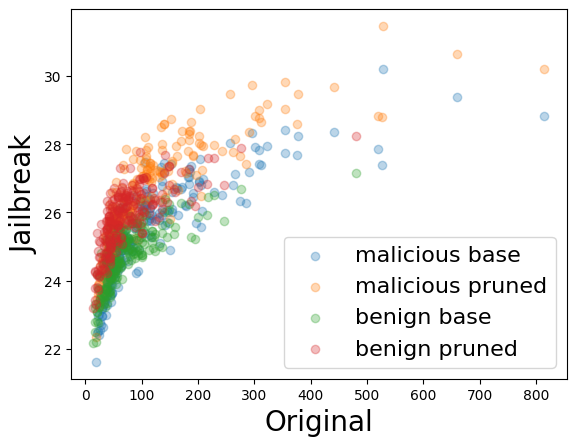

In [7]:
plt.scatter(malicious_loss_base_original, malicious_loss_base_jailbreak, label='malicious base', alpha=0.3)
plt.scatter(malicious_loss_base_original, malicious_loss_sparse_20_jailbreak, label='malicious pruned', alpha=0.3)
plt.scatter(benign_loss_base_original, benign_loss_base_jailbreak, label='benign base', alpha=0.3)
plt.scatter(benign_loss_base_original, benign_loss_sparse_20_jailbreak, label='benign pruned', alpha=0.3)

plt.xlabel('Original', fontsize=20)
plt.ylabel('Jailbreak', fontsize=20)

plt.legend(fontsize=16)

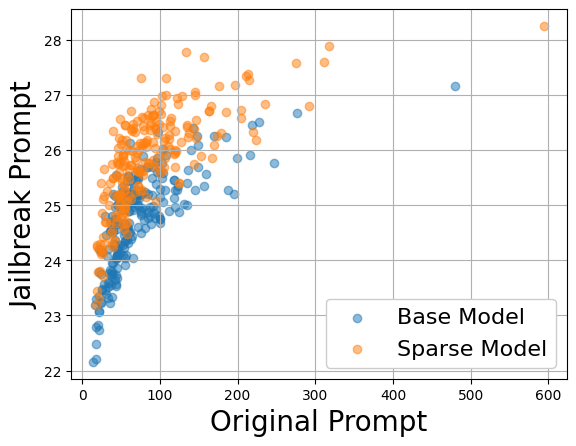

In [8]:
 plt.style.use("default")

plt.scatter(benign_loss_base_original, benign_loss_base_jailbreak, label='Base Model', alpha=0.5)
plt.scatter(benign_loss_sparse_20_original, benign_loss_sparse_20_jailbreak, label='Sparse Model', alpha=0.5)

plt.xlabel('Original Prompt', fontsize=20)
plt.ylabel('Jailbreak Prompt', fontsize=20)
legend = plt.legend(fontsize=16, facecolor='white', framealpha=1)
plt.grid()
plt.savefig('ppl.pdf', bbox_inches='tight', format='pdf')
